# Modelo de Regresión Lineal


__Por:__ _Ayar Yuman Paco Sanizo_

## Descripción del modelo
El modelo de regresión en general es de la forma:

$$
Y=\mathrm{E}[Y|X]+\varepsilon \\
$$
Donde,

* $Y$: Variable respuesta (Variable aleatoria)
* $X$: Vector predictor o regresor (Vector de variables aleatorias, valores conocidos o ambos)
* $\varepsilon$: Error (Variable aleatoria)

Luego, en un modelo de regresión lineal consideramos que $\mathrm{E}[Y|X]$ es lineal en sus parámetros, esto es:

$$
\mathrm{E}[Y|X]=\beta_0+\sum_{j=1}^{p-1}\beta_jX_j
$$

Entonces, el modelo de regresión lineal tiene forma:

$$
Y=\beta_0+\sum_{j=1}^{p-1}\beta_jX_j+\varepsilon
$$

Ahora, consideremos una muestra independiente e identicamente distribuida de tamaño $n$, 

$$
Y_i=\beta_0 +\beta_1 X_{i1}+...+\beta_{p-1} X_{i(p-1)}+\varepsilon_i \qquad i=1,...,n \\
$$

de forma completa tenemos,

$$
Y_1=\beta_0 1+\beta_1 X_{11}+...+\beta_{p-1} X_{1(p-1)}+\varepsilon_1 \\
Y_2=\beta_0 1+\beta_1 X_{21}+...+\beta_{p-1} X_{2(p-1)}+\varepsilon_2 \\
\vdots\\
Y_n=\beta_0 1+\beta_1 X_{n1}+...+\beta_{p-1} X_{n(p-1)}+\varepsilon_n
$$

Matricialmente,

$$
\Large \mathbf{Y} = \mathbf{X} \mathbf{B}+ \mathcal{E}
$$

Ahora veamos las condiciones que deben cumplirse cuando se consideran regresores estocásticos o fijos.

__Condiciones del modelo para regresores estocásticos__
    
* $\mathrm{E}[\mathcal{E}|\mathbf{X}]=0$
* $\mathrm{Var}[\mathcal{E}|\mathbf{X}]=\sigma^2 \mathbf{I}_n$
* $Rang(\mathbf{X})=p$
* $\mathcal{E}|\mathbf{X} \sim N_n(0,\sigma^2 \mathbf{I}_n)$ (para fines de inferencia)

__Condiciones del modelo para regresores fijos__

* $\mathrm{E}[\mathcal{E}]=0$
* $\mathrm{Var}[\mathcal{E}]=\sigma^2\mathbf{I}_n$
* $Rang(\mathbf{X})=p$
* $\mathcal{E} \sim N_n(0,\sigma^2 \mathbf{I}_n)$ (para fines de inferencia)

__Nota:__ Si bien en general los regresores $X_j$ pueden ser estocásticos (variables aleatorias) o fijos (valores conocidos), por conveniencia resulta práctico considerar que todos son fijos. Esta suposición no quita generalidad a los resultados de los siguientes puntos puesto que tomando regresores estocásticos llegamos a los mismos resultados considerando los respectivos supuestos.

Dicho esto continuamos el desarrollo considerando el modelo de regresión lineal con regresores fijos.

## Estimación de parámetros

Para estimar los parámetros del modelo minimizaremos una función de costo respecto a los errores. Es decir, los estimadores serán los valores que logren minimizar esta función.

Consideremos el siguiente ejemplo.

In [253]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Tamaño de muestra
n=100

# Regresores
x1 = np.random.uniform(low=0, high=15, size=(n,))
x2 = np.random.uniform(low=20, high=80, size=(n,))
x3 = np.random.uniform(low=10, high=40, size=(n,))

# Error
E = np.random.normal(loc=0.0, scale=10, size=n)

# Variable respuesta
Y=20.5+3.8*x1+6.5*x2+10*x3+E

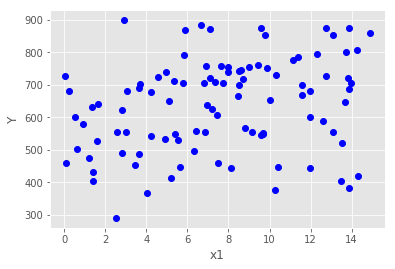

In [254]:
plt.plot(x1,Y,'o',color='blue')
plt.ylabel("Y")
plt.xlabel("x1")
plt.show()

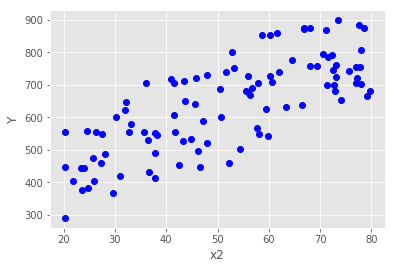

In [255]:
plt.plot(x2,Y,'o',color='blue')
plt.ylabel("Y")
plt.xlabel("x2")
plt.show()

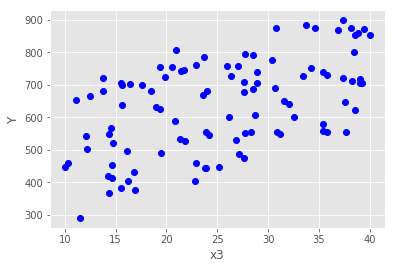

In [256]:
plt.plot(x3,Y,'o',color='blue')
plt.ylabel("Y")
plt.xlabel("x3")
plt.show()

### Ecuaciones Normales

Aplicando MCO, minimizaremos la suma de cuadrados de los errores, esto es

$$
\begin{align*}
\min \limits_{\beta_0,...,\beta_{p-1}} \varphi &= \sum_{i=1}^{n}\varepsilon_i^2
&
\qquad \min\limits_{\mathbf{B}} \varphi &=  \mathcal{E}'\mathcal{E}\\
\min \limits_{\beta_0,...,\beta_{p-1}} \varphi &= \sum_{i=1}^{n}\Big(Y_i - \beta_0 - \sum_{j=1}^{p-1}\beta_j x_{ij}\Big)^2
&
\qquad \min \limits_{\mathbf{B}} \varphi &= (\mathbf{Y} - \mathbf{X} \mathbf{B})'(\mathbf{Y} - \mathbf{X} \mathbf{B})
\end{align*}
$$

Derivando $\varphi$ respecto a $\mathbf{B}$, tenemos:

$$
\frac{\partial \varphi}{\partial \mathbf{B}}=-2\mathbf{X}'\mathbf{Y}+2\mathbf{X}'\mathbf{X}\mathbf{B}
$$

igualando a cero, el estimador MCO de $\mathbf{B}$ es:

$$
\hat{\mathbf{B}}=(\mathbf{X}'\mathbf{X})^{-1}\mathbf{X}'\mathbf{Y}
$$

__Nota:__ El anterior resultado se denomina ecuación normal. Nótese que es una ecuación vectorial por lo que en realidad se tienen $p$ ecuaciones.

____________________

Obtengamos los estimadores de los parámetros de nuestro ejemplo usando esta ecuación.

In [257]:
# Definamos nuestra matriz de datos...
x0 = np.ones(n)
aux = np.column_stack((x0,x1,x2,x3))
X = np.matrix(aux)

# Ojo..
print(Y.T.shape)
print(Y.shape)

# Arreglemos esto...
Y.shape = (n,1)
print(Y.shape)
print(Y.T.shape)

(100,)
(100,)
(100, 1)
(1, 100)


In [258]:
# Ahora si...
XtXinv = np.linalg.inv(np.dot(X.T,X))
XtY =np.dot(X.T,Y)
B_hat = np.dot(XtXinv,XtY)
print(B_hat)

[[14.72461221]
 [ 3.8594376 ]
 [ 6.56037512]
 [10.04953702]]


### Gradient Descent

Primero, para mantener la notación estándar consideremos que

$$
\begin{align*}
\theta&=\mathbf{B} & (\theta_0,...\theta_{p-1})'=(\beta_0,...\beta_{p-1})'\\
h_{\theta}(\mathbf{x}_i)=\theta_0 + \sum_{j=1}^{p-1}\theta_j x_{ij}&=\mathbf{x}_i'\mathbf{B}=\beta_0 + \sum_{j=1}^{p-1}\beta_j x_{ij}
\end{align*}
$$

Ahora, tomaremos la siguiente función de costo, que es muy similar a la que usamos anteriormente.

$$
J(\theta) = \frac{1}{2}\sum_{i=1}^{n}\Big(h_{\theta}(\mathbf{x}_i)-Y_i\Big)^2
$$

Luego, de igual forma nos interesa encontrar los valores de $\theta$ que minimizan esta función. Esto es

$$
\begin{align*}
\min \limits_{\theta} J(\theta) = \frac{1}{2}\sum_{i=1}^{n}\Big(h_{\theta}(\mathbf{x}_i)-Y_i\Big)^2
\qquad
\min \limits_{\beta_0,...,\beta_{p-1}} J(\theta_0,...,\theta_{p-1}) = \frac{1}{2}\sum_{i=1}^{n}\Big(\theta_0 + \sum_{j=1}^{p}\theta_j x_{ij}-Y_i\Big)^2 \\
\end{align*}
$$

__Solución al problema de optimización__

Si bien el problema es el mismo, ahora tomaremos un enfoque distinto, inicializaremos $\theta$ de forma aleatoria como nuestra primera adivinaza y posteriormente actualizaremos su valor de tal forma que en cada actualización obtengamos un valor de $J(\theta)$ menor.

Para actualizar el valor de $\theta$, sin embargo necesitamos saber si incrementar o decrementar su valor. Para esto, usaremos el gradiente de $J(\theta)$ respecto a $\theta$. Esto es

$$
\begin{align}
\frac{\partial}{\partial \theta_0}J(\theta)&=\sum_{i=1}^{n}\Big(\theta_0 + \sum_{j=1}^{p}\theta_j x_{ij}-Y_i\Big)*1
& \frac{\partial}{\partial \theta_0}J(\theta)&=\sum_{i=1}^{n}1*\Big(\theta_0 + \sum_{j=1}^{p}\theta_j x_{ij}-Y_i\Big)
\\
\frac{\partial}{\partial \theta_1}J(\theta)&=\sum_{i=1}^{n}\Big(\theta_0 + \sum_{j=1}^{p}\theta_j x_{ij}-Y_i\Big)*x_{i1} 
& \frac{\partial}{\partial \theta_0}J(\theta)&=\sum_{i=1}^{n}x_{i1}*\Big(\theta_0 + \sum_{j=1}^{p}\theta_j x_{ij}-Y_i\Big)
\\
\vdots && \vdots\\
\frac{\partial}{\partial \theta_{p-1}}J(\theta)&=\sum_{i=1}^{n}\Big(\theta_0 + \sum_{j=1}^{p}\theta_j x_{ij}-Y_i\Big)*x_{i(p-1)}
& \frac{\partial}{\partial \theta_0}J(\theta)&=\sum_{i=1}^{n}x_{i(p-1)}*\Big(\theta_0 + \sum_{j=1}^{p}\theta_j x_{ij}-Y_i\Big)
\end{align}
$$

Matricialmente,

$$
\frac{\partial}{\partial \theta}J(\theta)=\mathbf{X}'(\mathbf{X}\theta-Y) 
$$

Luego, en cada actualización de $\theta$ tenemos

$$
\begin{align}
\theta &:= \theta-\alpha*\frac{\partial}{\partial \theta}J(\theta) \\
\theta &:= \theta-\alpha*\mathbf{X}'(\mathbf{X}\theta-Y) 
\end{align}
$$

Donde,

* $\alpha$: Taza de aprendizaje (learning rate).

Ahora nos queda determinar cuantas veces debe actualizarse el valor de $\theta$. Intuitivamente es muy probable que se nos ocurra considerar un epsilon tal que cuando la norma del gradiente sobrepase este valor dejemos de iterar. Este enfoque es raramente usado en la práctica, en lugar de eso consideramos un numero finito de iteraciones denominados "epocs".

Con todas las piezas, formalicemos el algoritmo de gradient descent.

__Algoritmo:__

   1. Inicializar $\theta$ aleatoriamente
   2. Definir $\alpha$ y el número de iteraciones $epocs$
   3. Para $k$ de $1$ a $epocs$:
        * $\theta := \theta-\alpha*\frac{\partial}{\partial \theta}J(\theta)$

__Nota:__ Es importante notar que al usar gradient descent obtenemos un estimador de $\theta$ y por tanto deberíamos usar la notación $\hat{\theta}$. Lastimosamente en ML muchos autores cambian la notación a su gusto tratando de redescubrir notaciones ya establecidas en la teoría matemática y estadística.

__Gradient Descent Normalizado__

Notemos que según la dimensión de las variables habrán valores de $\alpha$ que aceleren el proceso de optimización. Podríamos definir valores $\alpha_j$ por cada variable de acuerdo a sus respectivas escalas. Para usar un único $\alpha$ y evitar que tengamos que cambiar su valor muy seguido, resulta conveniente normalizar los datos. Una variable se puede normalizar de distintas formas, una de las más conocidas es hacer que su promedio sea cero y su varianza uno. Esto es:

$$
z_{ij} = \frac{x_{ij}-\overline{x}_j}{\sqrt{S_{x_j}^2}}
$$

El modelo lineal respecto a las variables predictoras estandarizadas entonces es:

$$
\mathbf{Y}=\mathbf{Z}\mathbf{C}+\mathbf{\xi}
$$

Donde $Z$ es una matriz cuya primera columna tiene unos y el resto son las variables estandarizadas.

Luego, una vez normalizados los datos, podemos usar gradient descent para obtener el estimador de $\mathbf{C}$.

Finalmente, para recuperar los coeficientes no estandarizados usamos:

$$
\begin{align}
\hat{\beta}_j&=\frac{\hat{c}_j}{\sqrt{S_{X_j}^2}} \qquad j=1,...,p-1 \\
\hat{\beta}_0&=\hat{c}_0-\sum_{j=1}^{p-1}\hat{\beta}_j\overline{x}_j
\end{align}
$$

__Nota:__ También podríamos normalizar la variable de respuesta $\mathbf{Y}$. En dicho caso, los coeficientes no estandarizados se recuperan usando otras transformaciones.
__________________________________________
Obtengamos ahora los estimadores de nuestro modelo de ejemplo usando gradient descent.

In [259]:
# Primero estandaricemos nuestras variables....
z0 = np.copy(x0)
z1 = (x1 - np.mean(x1))/np.std(x1)
z2 = (x2 - np.mean(x2))/np.std(x2)
z3 = (x3 - np.mean(x3))/np.std(x3)

# Definamos nuestra matriz de datos estandarizados...
aux = np.column_stack((z0,z1,z2,z3))
Z = np.matrix(aux)

In [260]:
# Definamos la función del costo...
def costo(theta, X, Y):
    costo = (1/2)*sum(np.power((np.dot(X,theta)-Y),2))
    return(costo)

In [261]:
# Definamos la función del gradiente del costo...
def grad_costo(theta, X, Y):
    grad_costo = np.dot(X.T,
                        np.dot(X,theta)-Y)
    return(grad_costo)

In [262]:
# Definamos el algoritmo de gradient descent...
def gradient_descent(X, Y, alpha=0.01, epocs=1000):
    c = np.zeros(epocs)
    theta = np.random.uniform(low=0, high=1, size=(X.shape[1],1))
    # print(theta)
    for i in range(epocs):
        c[i] = costo(theta, X, Y)
        theta = theta-alpha*grad_costo(theta, X, Y)
    return(theta, c)

In [263]:
# Obtengamos los estimadores...
C_gd, c = gradient_descent(Z, Y, alpha=0.001, epocs=100)
print(C_gd)

[[637.45964083]
 [ 15.92415554]
 [117.78510613]
 [ 87.67951473]]


In [264]:
# Comparemos con los estimadores estandarizados usando las ecuaciones normales...
ZtZinv = np.linalg.inv(np.dot(Z.T,Z))
ZtY =np.dot(Z.T,Y)
C_hat = np.dot(ZtZinv,ZtY)
print(C_hat)

[[637.47656465]
 [ 15.90389196]
 [117.80454649]
 [ 87.70309245]]


In [265]:
# Finalmente, obtengamos los estimadores no estandarizados...
B_gd=np.zeros((4,1))
B_gd[1,]=C_gd[1,]/np.std(x1)
B_gd[2,]=C_gd[2,]/np.std(x2)
B_gd[3,]=C_gd[3,]/np.std(x3)
B_gd[0,]=C_gd[0,]-(B_gd[1,]*np.mean(x1)+B_gd[2,]*np.mean(x2)+B_gd[3,]*np.mean(x3))
print(B_gd)

[[14.79502154]
 [ 3.86435502]
 [ 6.55929252]
 [10.04683535]]


In [266]:
# Comparemos con los estimadores no estandarizados usando las ecuaciones normales...
print(B_hat)

[[14.72461221]
 [ 3.8594376 ]
 [ 6.56037512]
 [10.04953702]]


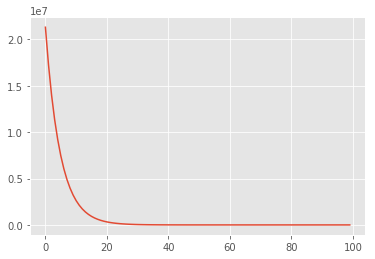

In [267]:
# ¡Genial! logramos obtener estimadores muy próximos a los óptimos analíticos.

# Por último, veamos como fue reduciendo el costo...
plt.plot(c)
plt.show()

[[0.58961808]
 [3.05794266]
 [7.39328392]
 [9.01149164]]


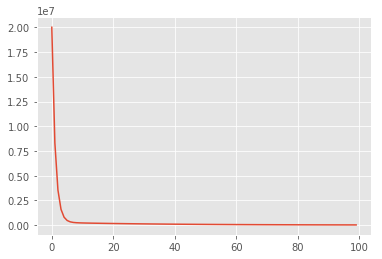

In [268]:
#...momento! y si no hubiesemos normalizado los datos??
B_gd2, c2 = gradient_descent(X, Y, alpha=0.000001, epocs=100)
print(B_gd2)
plt.plot(c2)

## Selección de variables

### Stepwise

Stepwise es un metodo iterativo para selecionar variables. Al usarlo partimos con un modelo base y en cada iteración incorporamos o quitamos variables tomando algún criterio de selección.

__Criterio de Información de Akaike__

Un criterio muy usado es el Criterio de Información de Akaike (AIC). Para un modelo de regresión lineal el AIC esta definido como:

$$
AIC = 2k + n\ln \Big(\frac{SCE}{n}\Big)+n\ln(2\pi)+n
$$

Sin embargo, como $2\pi$ es constante y $n$ es igual para todos los modelos lineales a comparar, el $AIC$ se puede calcular como:

$$
AIC = 2k + n\ln \Big(\frac{SCE}{n}\Big)
$$

donde,

* $k$: Número de parámetros.

* $n$: Número de observaciones

* $SCE$: Cuadrado medio de los errores.

Calculemos el AIC para un nuevo modelo de ejemplo:

In [364]:
# Definamos otras variables....
x4 = x1*x2
x5 = np.random.uniform(low=5, high=15, size=(n,))

# Ahora nuestro modelo será....
Y2 = 20.5+6.5*x2+2*x3+0.5*x4+E

In [365]:
# Recordemos que no sabemos como se comporta Y2, y por tanto podríamos pensar que sus regresores son solo x1 y x5...
X2 = np.column_stack((x0,x1,x5))

# Ahora usaremos una libreía de python para facilitar la estimación...
import statsmodels.api as sm
lm_base = sm.OLS(Y2,X2).fit()
lm_base.params

array([335.02562196,  28.35360066,   5.2819532 ])

In [366]:
# El AIC de este modelo es...
AIC = 2*3+n*np.log(sum(np.power(Y2-lm_base.fittedvalues,2))/n)+n*np.log(2*np.pi)+n
AIC

1339.434165252147

In [367]:
# Comparemos con el AIC que se calcula en la librería...
lm_base.aic

1339.434165252147

__Ejemplo Stepwise__

La mejor manera de entender stepwise es usarlo así que seleccionemos variables para nuestro ejemplo...

In [368]:
# Definamos una función para generar modelos y retornar el AIC...
def gen_model(Y,X,variables):
    lm = sm.OLS(Y,X[:,variables]).fit()
    return(round(lm.aic,2), lm)

In [374]:
# Ahora si.... 

#Primero, nuestro horizonte será el modelo que incluye todas las varaibles que definimos anteriormente: x1,...,x5
Xh = np.column_stack((x0,x1,x2,x3,x4,x5))

# Modelo base
print("Base: x0,x1,x5\n AIC = "+str(gen_model(Y2,Xh,[0,1,5])[0]))

# Paso 1:
# Variables en el modelo: x0, x1, x5
# Candidatos para incorporarse: x2, x3, x4
# Candidatos para quitarse: x1, x3
print("------------------------------------------")
print(" Paso 1")
print("------------------------------------------")
print("Base + x2\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2])[0]))
print("Base + x3\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,3])[0]))
print("Base + x4\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,4])[0]))
print("Base - x1\n AIC = "+str(gen_model(Y2,Xh,[0,5])[0]))
print("Base - x5\n AIC = "+str(gen_model(Y2,Xh,[0,1])[0]))

Base: x0,x1,x5
 AIC = 1339.43
------------------------------------------
 Paso 1
------------------------------------------
Base + x2
 AIC = 1045.61
Base + x3
 AIC = 1341.35
Base + x4
 AIC = 1087.5
Base - x1
 AIC = 1369.43
Base - x5
 AIC = 1338.14


In [375]:
# Nuestra mejor alternativa es incorporar x2
print("Base: x0,x1,x5,x2\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2])[0]))

# Paso 2:
# Variables en el modelo: x0, x1, x5, x2
# Candidatos para incorporarse: x3, x4
# Candidatos para quitarse: x1, x5, x2
print("------------------------------------------")
print(" Paso 2")
print("------------------------------------------")
print("Base + x3\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2,3])[0]))
print("Base + x4\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2,4])[0]))
print("Base - x1\n AIC = "+str(gen_model(Y2,Xh,[0,5,2])[0]))
print("Base - x5\n AIC = "+str(gen_model(Y2,Xh,[0,1,2])[0]))
print("Base - x2\n AIC = "+str(gen_model(Y2,Xh,[0,1,5])[0]))

Base: x0,x1,x5,x2
 AIC = 1045.61
------------------------------------------
 Paso 2
------------------------------------------
Base + x3
 AIC = 1024.43
Base + x4
 AIC = 889.91
Base - x1
 AIC = 1233.59
Base - x5
 AIC = 1043.62
Base - x2
 AIC = 1339.43


In [376]:
# Nuestra mejor alternativa es incorporar x4
print("Base: x0,x1,x5,x2,x4\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2,4])[0]))

# Paso 3:
# Variables en el modelo: x0, x1, x5, x4, x2
# Candidatos para incorporarse: x3
# Candidatos para quitarse: x1, x5, x4, x2
print("------------------------------------------")
print(" Paso 3")
print("------------------------------------------")
print("Base + x3\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2,4,3])[0]))
print("Base - x1\n AIC = "+str(gen_model(Y2,Xh,[0,5,2,4])[0]))
print("Base - x5\n AIC = "+str(gen_model(Y2,Xh,[0,1,2,4])[0]))
print("Base - x2\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,4])[0]))
print("Base - x4\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2])[0]))

Base: x0,x1,x5,x2,x4
 AIC = 889.91
------------------------------------------
 Paso 3
------------------------------------------
Base + x3
 AIC = 741.19
Base - x1
 AIC = 888.47
Base - x5
 AIC = 887.91
Base - x2
 AIC = 1087.5
Base - x4
 AIC = 1045.61


In [377]:
# Nuestra mejor alternativa es incorporar x3
print("Base: x0,x1,x5,x2,x4,x3\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2,4,3])[0]))

# Paso 4:
# Variables en el modelo: x0, x1, x5, x2, x4, x3
# Candidatos para incorporarse: -
# Candidatos para quitarse: x1, x5, x2, x4, x3
print("------------------------------------------")
print(" Paso 4")
print("------------------------------------------")
print("Base - x1\n AIC = "+str(gen_model(Y2,Xh,[0,5,2,4,3])[0]))
print("Base - x5\n AIC = "+str(gen_model(Y2,Xh,[0,1,2,4,3])[0]))
print("Base - x2\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,4,3])[0]))
print("Base - x4\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2,3])[0]))
print("Base - x3\n AIC = "+str(gen_model(Y2,Xh,[0,1,5,2,4])[0]))

Base: x0,x1,x5,x2,x4,x3
 AIC = 741.19
------------------------------------------
 Paso 4
------------------------------------------
Base - x1
 AIC = 741.6
Base - x5
 AIC = 739.29
Base - x2
 AIC = 1084.77
Base - x4
 AIC = 1024.43
Base - x3
 AIC = 889.91


In [378]:
# Nuestra mejor alternativa es quitar x5
print("Base: x0,x1,x2,x4,x3\n AIC = "+str(gen_model(Y2,Xh,[0,1,2,4,3])[0]))

# Paso 5:
# Variables en el modelo: x0, x1, x2, x4, x3
# Candidatos para incorporarse: x5
# Candidatos para quitarse: x1, x2, x4, x3
print("------------------------------------------")
print(" Paso 5")
print("------------------------------------------")
print("Base + x5\n AIC = "+str(gen_model(Y2,Xh,[0,1,2,4,3,5])[0]))
print("Base - x1\n AIC = "+str(gen_model(Y2,Xh,[0,2,4,3])[0]))
print("Base - x2\n AIC = "+str(gen_model(Y2,Xh,[0,1,4,3])[0]))
print("Base - x4\n AIC = "+str(gen_model(Y2,Xh,[0,1,2,3])[0]))
print("Base - x3\n AIC = "+str(gen_model(Y2,Xh,[0,1,2,4])[0]))

Base: x0,x1,x2,x4,x3
 AIC = 739.29
------------------------------------------
 Paso 4
------------------------------------------
Base + x5
 AIC = 741.19
Base - x1
 AIC = 739.68
Base - x2
 AIC = 1082.83
Base - x4
 AIC = 1022.43
Base - x3
 AIC = 887.91


In [380]:
# Luego, nuestra mejor alternativa es mantener el modelo base con las varaibles: x0,x1,x2,x4,x3
# Veamos el resumen de este modelo...
gen_model(Y2,Xh,[0,1,2,4,3])[1].summary()

# Si bien stepwise nos recomienda usar x1, en los resultados obtenemos un p-valor mayor a 0.05 para esta variable!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.378e+04
Date:                Thu, 10 May 2018   Prob (F-statistic):          2.42e-130
Time:                        00:28:55   Log-Likelihood:                -364.64
No. Observations:                 100   AIC:                             739.3
Df Residuals:                      95   BIC:                             752.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.6613      6.836      3.461      0.001      10.091      37.232
x1            -1.0407      0.686     -1.517      0.133      -2.403       0.322
x2             6.3807      0.118     53.981      0.000       6.146       6.615
x3             0.5226      0.013     39.366      0.000       0.496       0.549
x4             2.0378      0.112     18.261      0.000       1.816       2.259
==============================================================================
Omnibus:                        4.318   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                3.671
Skew:                          -0.440   Prob(JB):                        0.160
Kurtosis:                       3.328   Cond. No.                     3.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Nota:__ Debemos notar que los $AIC$ fueron calculados considerando los mismos datos que ingresaron al modelo. Si bien este enfoque es aceptado, otra alternativa es calcularlos respecto a un conjunto de datos de testeo. 

### LASSO

Al usar LASSO obtenemos estimadores de los parámetros penalizándolos tratando de contraerlos a cero. LASSO es una variante de la regresión "ridge". En ambos casos se resuelve un problema de minimzación sujeto a alguna restricción.

__Regresion Ridge__

En la regresión Ridge, resolvemos el siguiente problema:

$$
\min\limits_{\beta} \sum_{i=1}^{n}\Big(y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij}\Big)^2 sujeto \ a \sum_{j=1}^{p}\beta^2_j 	\leq s
$$


Es decir, obtenemos los estimadores de los parámetros minimizando la siguiente función:

$$
\sum_{i=1}^{n}\Big(y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij}\Big)^2 + \lambda \sum_{j=1}^{p}\beta^2_j = SCE + + \lambda \sum_{j=1}^{p}\beta^2_j 
$$

,donde $\lambda$ es el parámetro "tuneador".

__LASSO__

Al usar LASSO (Least Absolute Shrinkage and Selection Operator), resolvemos el siguiente problema:

$$
\min\limits_{\beta} \sum_{i=1}^{n}\Big(y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij}\Big)^2 sujeto \ a \sum_{j=1}^{p}|{\beta_j}| 	\leq s
$$


Entoces, obtenemos los estimadores de los parámetros minimizando la siguiente función:

$$
\sum_{i=1}^{n}\Big(y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij}\Big)^2 + \lambda \sum_{j=1}^{p}|{\beta_j}| = SCE + \lambda \sum_{j=1}^{p}|\beta_j|
$$

__Ejemplo__

Usando LASSO en nuestro problema tenemos...

## Caso de estudio

Ahora vamos a repasar todo lo que aprendimos para plantear un modelo usando datos reales. Al mismo tiempo aprovecharemos para aprender sobre la marcha algunas prácticas comunes.

## Referencias
__Libros y papers__
* G. James, D. Witten, T. Hastie, R. Tibshirani (2013). An Introduction to Statistical Learning. 205-227.
* Hastie, Tibshirani, Friedman (2008). The Elements of Statistical Machine Learning. 57 - 73
* Ana González Vidal (2015). Selección de variables: Una revisión de métodos existentes.
* Tibshirani, R. (1996). Regression Shrinkage and Selection via the Lasso. Journal of the Royal Statistical Society. Series B (Methodological), 58(1), 267-288.
* Valeria Fonti (2017). Feature Selection using LASSO. VU Amsterdam.

__Páginas web__

* http://www.real-statistics.com/multiple-regression/standardized-regression-coefficients/
* http://statweb.stanford.edu/~tibs/lasso.html
* https://stats.stackexchange.com/questions/17251/what-is-the-lasso-in-regression-analysis
* https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
* https://stats.stackexchange.com/questions/7935/what-are-disadvantages-of-using-the-lasso-for-variable-selection-for-regression
* https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html

__Datos__
* https://archive.ics.uci.edu/ml/datasets/Automobile